<a href="https://colab.research.google.com/github/HyejuSeon/deep_learning_study/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

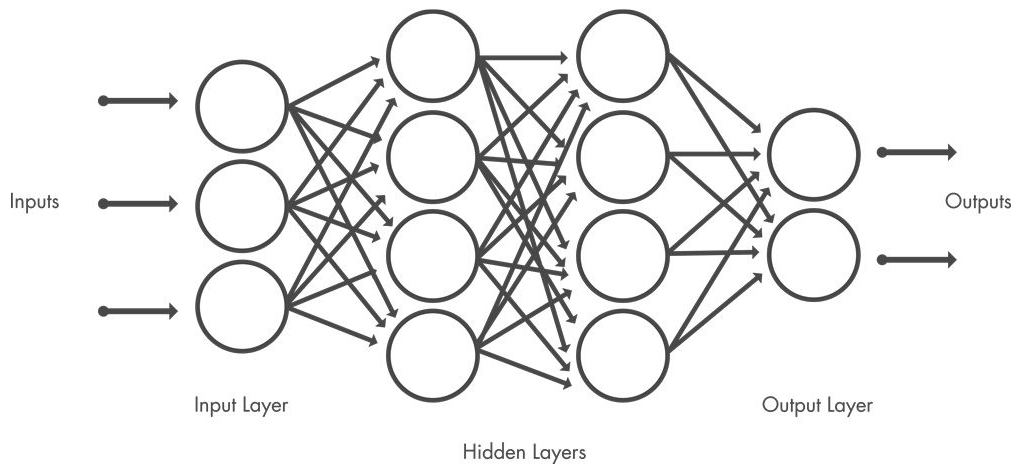

## 딥러닝
- 머신러닝의 한 분야로 인공신경망을 쌓아올려 데이터를 학습하는 방식
- 크게 input layer, hidden layer, output layer로 나뉨
- 다음 레이어로 전달될 때 각 유닛에 가중치(w)가 곱해져서 전달됨

  -> 전달 받은 결과의 모두 더해서 해당 유닛을 활성화시킬지 판단

  -> 이때 activation function을 씌워서 값을 보정
 (https://wikidocs.net/60683)

- 가설 수립 -> 모델 정의 및 학습 -> 평가 -> 가설 수립(피드백) -> 모델 정의 및 학습 -> ... 반복 ...

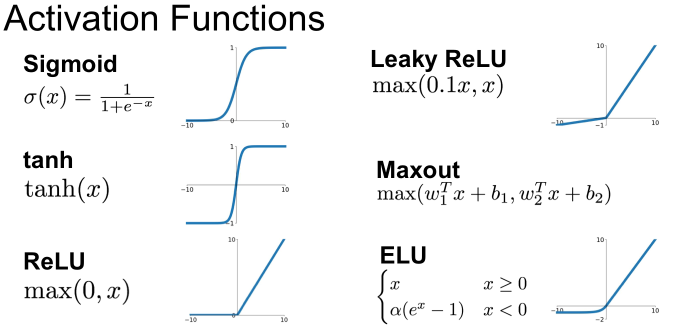

In [49]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.datasets import mnist

In [50]:
import tensorflow as tf
print(tf.test.gpu_device_name())

/device:GPU:0


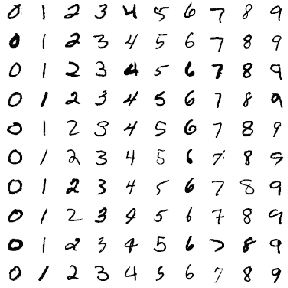

## Train/Validation/Test split



### split 비율

- train:test = 7:3 or train:val:test = 6:2:2

- BUT 빅데이터는 98:1:1
    
  val/testset은 평가만 하기 때문에



In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)


In [4]:
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [5]:
type(x_train)
# python list 보다 연산이 빠름
# -> 행렬 내적 연산 훨씬 빠름

numpy.ndarray

In [ ]:
x_train[0]

5


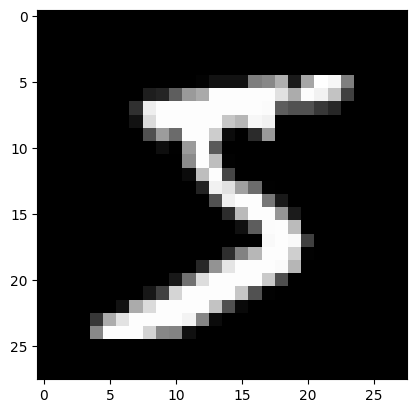

In [7]:
plt.imshow(x_train[0], cmap='gray')
print(y_train[0])

In [18]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

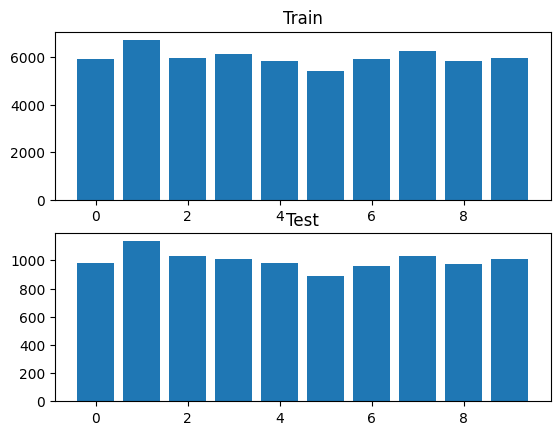

In [46]:
labels_train, cnts_train = np.unique(y_train, return_counts=True)
labels_test, cnts_test = np.unique(y_test, return_counts=True)

plt.subplot(2, 1, 1)
plt.bar(labels_train, cnts_train)
plt.title('Train')

plt.subplot(2, 1, 2)
plt.bar(labels_test, cnts_test)
plt.title('Test')
plt.show()

## loss

- 정답값과 모델의 예측값을 통해 loss를 계산하는 함수

- 모델은 loss를 최소화하는 weight을 찾는 방향으로 학습 수행 -> 이때 사용하는 최적화 알고리즘이 optimizer

#### binary_crossentropy
- binary classification

<br>

#### categorical_crossentropy
- multi-class classification
- label이 one-hot encoding 형태일 때 사용

>  label에 사람, 강아지, 고양이가 있다면 <br> 사람 -> (1, 0, 0) <br> 강아지 -> (0, 1, 0) <br> 고양이 -> (0, 0, 1)

<br>

#### sparse_categorical_crossentropy
- multi-class classification
- label 정수 형태에서 사용

> label 예시 - 정수 <br> 사람 -> 0, 강아지 -> 1, 고양이 -> 2

In [27]:
model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.1412 - accuracy: 0.8483
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3641 - accuracy: 0.9113
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2760 - accuracy: 0.9302
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2484 - accuracy: 0.9369
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2272 - accuracy: 0.9433
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2115 - accuracy: 0.9465
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2119 - accuracy: 0.9475
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2012 - accuracy: 0.9491
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1903 - accuracy: 0.9532
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.184

In [28]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2571 - accuracy: 0.9459


[0.2571479380130768, 0.945900022983551]

In [62]:
model(x_train[:1])

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.0000000e+00, 3.8024923e-21, 0.0000000e+00, 1.2134931e-04,
        9.1773041e-36, 9.9987864e-01, 0.0000000e+00, 2.8804307e-12,
        2.0300078e-14, 9.9684305e-09]], dtype=float32)>

In [34]:
y_train[0]

5

## Bias (편향) / Variance (분산)

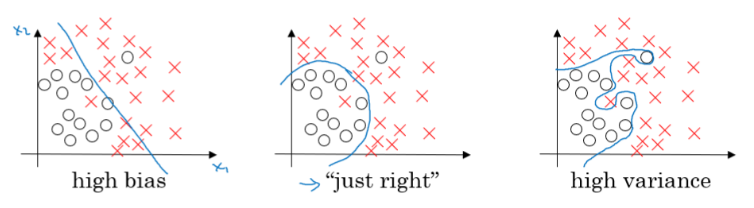

- high variance -> Overfitting
- high bias -> Underfitting

<br>

- 어떻게 판단?

  Training error 낮고, Dev error 높음 -> Overfitting (일반화 x)

  Training error 높고, Dev error 높음 -> Underfitting (+Overfitting -> error 차이가 큰 경우)

<br>

- 해결 방법

  High bias -> 더 큰 네트워크 사용(more layer, more hidden units), epoch 증가

  High Variance -> 더 많은 데이터 학습, 정규화 (Regularization)

  <br>


- 둘은 tradeoff?

  예전엔 YES, 지금은 더 큰 네트워크 구성하면 bias는 variance와 상관없이 대체로 줄어듦

## Regularization

#### L2 norm

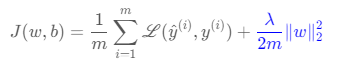


- 위 수식은 가장 많이 사용되는 L2 Regularization -> 가중치 감쇠라고도 함 (Weight Decay)

- lambda 값이 클수록 규제 효과가 커짐 -> hidden unit의 영향도가 작아짐

### Dropout

- 각 레이어에서 비활성화할 노드 비율 설정

- test set은 dropout 사용 X -> 예측값이 랜덤해짐 -> noise 추가

### Data Augementation

### Early Stopping


## Normalization

- feature 간 데이터 스케일을 유사하게 맞춤 + feature 값의 범위가 클수록 학습이 어려움 -> 학습 시 더 빠르게 최적화 가능

  learning rate 높게 설정하면 값이 발산해서 최적화가 힘듦

  ex. x1: -1 ~ 1, x2: -100000000000 ~ 100000000000

## mini batch

- 전체 데이터를 작은 데이터셋 여러 개로 나누어 학습

  -> 한 번에 학습할 데이터셋이 작아짐 -> 연산량 감소 -> 가중치 업데이트가 빠름

  -> 근데 또 너무 크면 1 epoch 마다 학습할 데이터셋이 많아서 시간 오래 걸림

- 보통 64, 128, 256, 512로 세팅




In [63]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

In [ ]:
np.unique(x_train_norm)

In [67]:
model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4208 - accuracy: 0.8715
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1666 - accuracy: 0.9517
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1184 - accuracy: 0.9651
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0872 - accuracy: 0.9742
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0676 - accuracy: 0.9796
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0533 - accuracy: 0.9834
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0431 - accuracy: 0.9864
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0353 - accuracy: 0.9890
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0286 - accuracy: 0.9915
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.024

In [68]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0883 - accuracy: 0.9760


[0.08830219507217407, 0.9760000109672546]

In [ ]:
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [ ]:
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10)

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

# Create an instance of the model
model = MyModel()

훈련에 필요한 옵티마이저(optimizer)와 손실 함수를 선택합니다:

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.Adam()

모델의 손실과 성능을 측정할 지표를 선택합니다. 에포크가 진행되는 동안 수집된 측정 지표를 바탕으로 최종 결과를 출력합니다.

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

`tf.GradientTape`를 사용하여 모델을 훈련합니다:

In [ ]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

이제 모델을 테스트합니다:

In [ ]:
@tf.function
def test_step(images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [ ]:
EPOCHS = 5

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Accuracy: {train_accuracy.result() * 100}, '
    f'Test Loss: {test_loss.result()}, '
    f'Test Accuracy: {test_accuracy.result() * 100}'
  )

훈련된 이미지 분류기는 이 데이터셋에서 약 98%의 정확도를 달성합니다. 더 자세한 내용은 [TensorFlow 튜토리얼](https://www.tensorflow.org/tutorials/)을 참고하세요.

In [ ]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.3/614.3 kB 9.7 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Use the model
model.train(data="coco128.yaml", epochs=3)  # train the model
metrics = model.val()  # evaluate model performance on the validation set
results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image
path = model.export(format="onnx")  # export the model to ONNX format


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLO model (recommended for training)
model = YOLO('yolov8n.pt')

# Train the model using the 'coco128.yaml' dataset for 3 epochs
results = model.train(data='coco128.yaml', epochs=3)

# Evaluate the model's performance on the validation set
results = model.val()

# Perform object detection on an image using the model
results = model('https://ultralytics.com/images/bus.jpg')

# Export the model to ONNX format
success = model.export(format='onnx')

Ultralytics YOLOv8.0.172 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco128.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



In [ ]:
from ultralytics import YOLO
from PIL import Image
import cv2

model = YOLO("yolov8n.pt")
# accepts all formats - image/dir/Path/URL/video/PIL/ndarray. 0 for webcam
results = model.predict('source=0')
results = model.predict(source="folder", show=True) # Display preds. Accepts all YOLO predict arguments

# from PIL
im1 = Image.open("bus.jpg")
results = model.predict(source=im1, save=True)  # save plotted images

# from ndarray
im2 = cv2.imread("bus.jpg")
results = model.predict(source=im2, save=True, save_txt=True)  # save predictions as labels

# from list of PIL/ndarray
results = model.predict(source=[im1, im2])

FileNotFoundError: ignored